In [1]:
import pandas as pd

In [2]:
#Reading csv file and making copy of that .
file = pd.read_table("D:\\datasets\\Restaurant_reviews\\Restaurant_Reviews.tsv")
df = file.copy()
df.sample(10)

,Review,Liked
883,I ordered Albondigas soup - which was just war...,0
660,"I personally love the hummus, pita, baklava, f...",1
912,"i felt insulted and disrespected, how could yo...",0
966,But I don't like it.,0
463,The manager was the worst.,0
848,"To my disbelief, each dish qualified as the wo...",0
19,did not like at all.,0
619,I will not return.,0
688,The steak was amazing...rge fillet relleno was...,1
0,Wow... Loved this place.,1


In [3]:
#Getting informantion of file .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
#Importing needed modules .
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
#Creating a function to remove stop words from each text .
def Filter(text)->str :
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    temp = ''
    text = text.lower()
    for word in text.split() :
        if word not in stopwords :
            temp += word
            temp += ' '
    return temp[:-1]

In [6]:
#Spliting our data to features and labels .
text = df['Review'].to_numpy()
classes = df.Liked.to_numpy().reshape(-1,1)

In [7]:
filtered_text = list(map(Filter,text))

In [8]:
#Tokenizing texts and transfering them to a matrix .
tokenizer = Tokenizer(oov_token='<00U00>')
tokenizer.fit_on_texts(filtered_text)
sequences = tokenizer.texts_to_sequences(filtered_text)
feutures = pad_sequences(sequences,padding='post',truncating='post',maxlen=16)

In [9]:
#Splitting features and labels to train and valid sets .
idx = (int(input('Enter training size :')) * len(feutures)) // 100
train_x = feutures[:idx]
train_y = classes[:idx]
valid_x = feutures[idx:]
valid_y = classes[idx:]
print(train_x.shape)
print(train_y.shape)
print(valid_x.shape)
print(valid_y.shape)

Enter training size :99
(990, 16)
(990, 1)
(10, 16)
(10, 1)


In [32]:
#creating model by a function .
from tensorflow.keras import layers , models
from tensorflow.keras.optimizers import Adam ,RMSprop
def Create_model()->None :
    model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,2,input_length=16)
                               ,layers.Flatten()
                               ,layers.Dense(70,activation='relu')
                               ,layers.Dropout(0.2)
                               ,layers.Dense(1,activation='sigmoid')])
    model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [33]:
#datas training .
history = Create_model().fit(train_x,train_y,epochs=10,validation_data = (valid_x,valid_y))

Epoch 1/10
31/31 [==============================] - 1s 10ms/step - loss: 0.6935 - accuracy: 0.4980 - val_loss: 0.6945 - val_accuracy: 0.4000
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.6131 - val_loss: 0.6905 - val_accuracy: 0.6000
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.7242 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.8051 - val_loss: 0.6777 - val_accuracy: 0.6000
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.8838 - val_loss: 0.6204 - val_accuracy: 0.8000
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.9323 - val_loss: 0.5673 - val_accuracy: 0.8000
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 0.3500 - accuracy: 0.9515 - val_loss: 0.5338 - val_accuracy: 0.9000
Epoch 8/10
31/31 [=

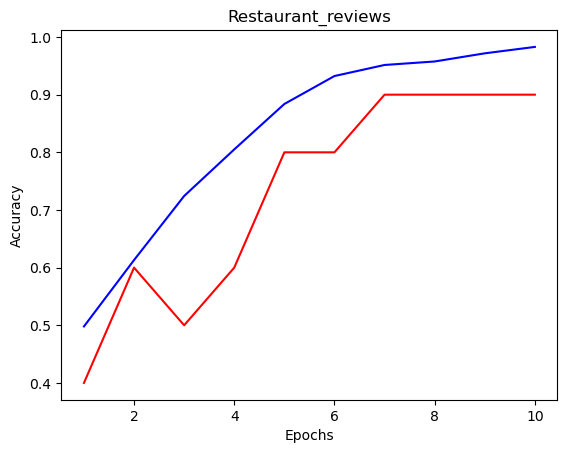

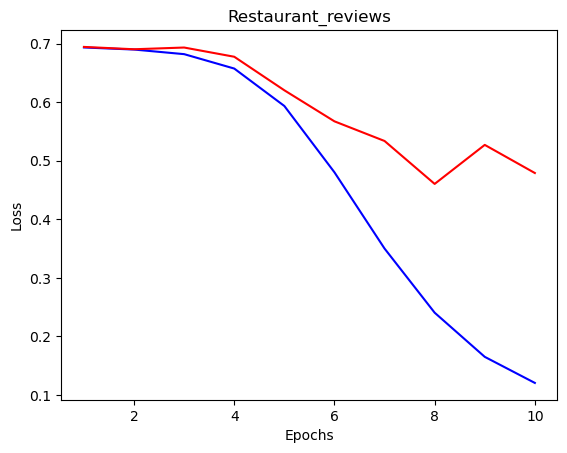

In [35]:
#Visualize models performance
import matplotlib.pyplot as plt
epoch = range(1,11)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Restaurant_reviews')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Restaurant_reviews')
plt.show()